# Random Forrests for Exploration of DEAP Dataset
Fingerprinting with OMA modes has worked really well. What about in tabular format?

In [23]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
%%javascript
utils.load_extension('collapsible_headings/main')
utils.load_extension('hide_input/main')
utils.load_extension('execute_time/ExecuteTime')
utils.load_extension('code_prettify/code_prettify')
utils.load_extension('scroll_down/main')
utils.load_extension('jupyter-js-widgets/extension')

<IPython.core.display.Javascript object>

In [25]:
from fastai.tabular import *

In [26]:
PATH = "/media/tris/tris_files/EEG_datasets/OMA/window"

In [27]:
df_raw = pd.read_csv('/media/tris/tris_files/EEG_datasets/OMA/window/OMA_deap_window_head.csv')
df_raw

,Subject,Trial,Real_Comp1_Mode1,Real_Comp2_Mode1,Real_Comp3_Mode1,Real_Comp4_Mode1,Real_Comp5_Mode1,Real_Comp6_Mode1,Real_Comp7_Mode1,Real_Comp8_Mode1,...,zeta5,zeta6,zeta7,fn1,fn2,fn3,fn4,fn5,fn6,fn7
0,1,1,0.081948,-0.045425,-0.015341,-0.076406,0.171911,0.138256,-0.036334,-0.163510,...,-0.051060,-0.077595,-0.035316,0.044253,-0.011422,0.032761,0.036446,0.093352,0.019047,45.343738
1,1,2,0.049658,0.009936,0.017493,-0.036572,0.046062,0.030815,-0.004333,-0.053269,...,-0.313788,-0.102129,0.234990,0.556034,-0.339402,-0.340453,-0.097615,0.110119,0.011303,41.336668
2,1,3,0.168706,-0.067328,0.087951,-0.029108,0.285195,0.090563,-0.165873,-0.376551,...,0.178666,-0.025014,-0.349329,-0.488738,0.337106,0.338119,0.184487,-0.002215,0.019710,40.198276
3,1,4,-0.195931,0.064528,-0.073303,0.056689,-0.257539,-0.099162,0.151166,0.382519,...,0.200335,-0.001949,-0.208238,-0.534020,0.417333,0.369180,0.162184,-0.209589,0.009616,48.866446
4,1,5,-0.122429,0.024698,0.052268,0.085952,-0.197063,-0.162514,0.035680,0.108430,...,-0.178251,-0.066832,0.178333,0.325097,-0.204320,-0.241421,-0.034872,0.097101,0.006341,47.811462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5115,32,156,-0.357643,-0.491085,0.209572,-0.171950,0.338017,0.007259,0.585254,0.222424,...,0.130738,0.157728,-0.073260,0.035155,-0.099400,-0.010219,-0.206379,-0.079857,0.014983,30.739507
5116,32,157,-0.358014,-0.582069,0.212574,-0.247489,0.437359,0.003154,0.714734,0.266580,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,28.682687
5117,32,158,-0.379006,-0.487530,0.214247,-0.157777,0.327218,0.016778,0.575243,0.213227,...,-0.015303,-0.231798,0.010316,-0.188196,0.253593,-0.023508,0.315596,0.116271,0.032695,26.565669
5118,32,159,0.111528,0.150362,-0.060776,0.045534,-0.100818,-0.012377,-0.170067,-0.047020,...,0.194464,0.271677,-0.133987,0.107742,-0.205606,0.007676,-0.341775,-0.160257,0.007078,27.228309


In [28]:
df_raw.iloc[[40],:]

,Subject,Trial,Real_Comp1_Mode1,Real_Comp2_Mode1,Real_Comp3_Mode1,Real_Comp4_Mode1,Real_Comp5_Mode1,Real_Comp6_Mode1,Real_Comp7_Mode1,Real_Comp8_Mode1,...,zeta5,zeta6,zeta7,fn1,fn2,fn3,fn4,fn5,fn6,fn7
40,1,41,0.039184,0.058918,-0.065916,-0.123054,0.146321,0.102099,0.081156,-0.021269,...,-0.03036,-0.036511,0.167833,0.226212,-0.148387,-0.210056,-0.299728,-0.136652,0.008732,45.824037


In [29]:
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/eeg-raw')

In [30]:
import pandas as pd
df_raw = pd.read_feather('tmp/eeg-raw') #lol raw sashimis and sushis
df_raw.head()

,Subject,Trial,Real_Comp1_Mode1,Real_Comp2_Mode1,Real_Comp3_Mode1,Real_Comp4_Mode1,Real_Comp5_Mode1,Real_Comp6_Mode1,Real_Comp7_Mode1,Real_Comp8_Mode1,...,zeta5,zeta6,zeta7,fn1,fn2,fn3,fn4,fn5,fn6,fn7
0,1,1,0.081948,-0.045425,-0.015341,-0.076406,0.171911,0.138256,-0.036334,-0.163510,...,-0.051060,-0.077595,-0.035316,0.044253,-0.011422,0.032761,0.036446,0.093352,0.019047,45.343738
1,1,2,0.049658,0.009936,0.017493,-0.036572,0.046062,0.030815,-0.004333,-0.053269,...,-0.313788,-0.102129,0.234990,0.556034,-0.339402,-0.340453,-0.097615,0.110119,0.011303,41.336668
2,1,3,0.168706,-0.067328,0.087951,-0.029108,0.285195,0.090563,-0.165873,-0.376551,...,0.178666,-0.025014,-0.349329,-0.488738,0.337106,0.338119,0.184487,-0.002215,0.019710,40.198276
3,1,4,-0.195931,0.064528,-0.073303,0.056689,-0.257539,-0.099162,0.151166,0.382519,...,0.200335,-0.001949,-0.208238,-0.534020,0.417333,0.369180,0.162184,-0.209589,0.009616,48.866446
4,1,5,-0.122429,0.024698,0.052268,0.085952,-0.197063,-0.162514,0.035680,0.108430,...,-0.178251,-0.066832,0.178333,0.325097,-0.204320,-0.241421,-0.034872,0.097101,0.006341,47.811462


In [31]:
df_raw.iloc[[500],:]

,Subject,Trial,Real_Comp1_Mode1,Real_Comp2_Mode1,Real_Comp3_Mode1,Real_Comp4_Mode1,Real_Comp5_Mode1,Real_Comp6_Mode1,Real_Comp7_Mode1,Real_Comp8_Mode1,...,zeta5,zeta6,zeta7,fn1,fn2,fn3,fn4,fn5,fn6,fn7
500,4,21,-0.099069,-0.055218,-0.036165,-0.040194,-0.158406,0.026834,-0.016414,-0.051565,...,0.147992,0.07039,0.051162,0.05768,0.226745,-0.044032,0.024808,0.077201,0.013733,38.784331


AttributeError: 'DataFrame' object has no attribute 'Real_Comp1'

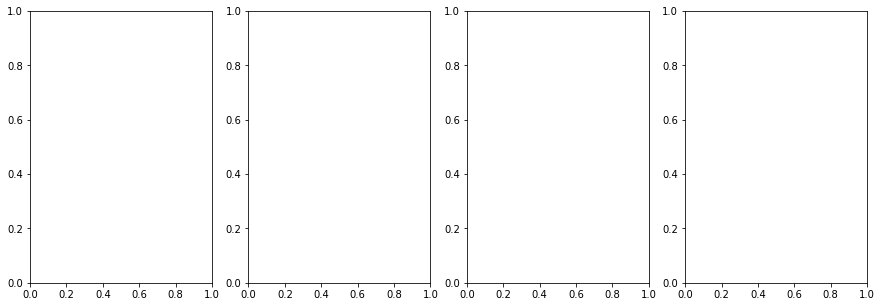

In [32]:
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
axs[0].hist(df_raw.Real_Comp1)
axs[0].set_title('Real_Comp1')
axs[1].hist(df_raw.fn)
axs[1].set_title('Damping')
axs[2].hist(df_raw.Imag_Comp1)
axs[2].set_title('Imag Chan. 27')
axs[3].hist(df_raw.zeta)
axs[3].set_title('freq')

In [33]:
valid_idx=np.random.randint(low=0, high=len(df_raw), size=1000) #size is 0.2*totalobersvations

In [34]:
dep_var= 'Subject'

In [35]:
path = "/media/tris/tris_files/EEG_datasets/DMD/tabular"

In [36]:
data = TabularDataBunch.from_df(path, df_raw, dep_var, valid_idx=valid_idx)

In [37]:
data.show_batch()

Imag_Comp15_Mode6,Real_Comp13_Mode6,Imag_Comp22_Mode4,Imag_Comp28_Mode7,zeta5,Imag_Comp7_Mode4,Real_Comp17_Mode6,Imag_Comp5_Mode6,Imag_Comp11_Mode7,Real_Comp30_Mode1,Real_Comp26_Mode2,Real_Comp6_Mode7,Imag_Comp24_Mode1,Imag_Comp30_Mode4,Real_Comp23_Mode4,Imag_Comp6_Mode2,Real_Comp19_Mode1,Imag_Comp5_Mode2,Imag_Comp13_Mode6,zeta3,Imag_Comp32_Mode6,Imag_Comp27_Mode4,Real_Comp28_Mode6,Imag_Comp12_Mode7,Imag_Comp27_Mode5,Imag_Comp1_Mode7,Real_Comp6_Mode1,Real_Comp29_Mode4,Real_Comp18_Mode1,Imag_Comp29_Mode4,Real_Comp20_Mode2,Imag_Comp18_Mode5,Imag_Comp16_Mode6,Real_Comp3_Mode5,Real_Comp18_Mode6,Real_Comp27_Mode7,Imag_Comp17_Mode4,Real_Comp13_Mode7,Imag_Comp1_Mode6,Real_Comp16_Mode5,Imag_Comp10_Mode1,Imag_Comp19_Mode6,Imag_Comp16_Mode4,Imag_Comp20_Mode2,Real_Comp31_Mode5,Real_Comp29_Mode1,Real_Comp24_Mode4,Real_Comp14_Mode7,Imag_Comp21_Mode2,Real_Comp4_Mode2,Real_Comp25_Mode4,Real_Comp2_Mode3,Real_Comp11_Mode5,Imag_Comp23_Mode1,Imag_Comp24_Mode4,Imag_Comp31_Mode5,Imag_Comp17_Mode2,Imag_Comp9_Mode7,Real_Comp3_Mode7,Imag_Comp15_Mode5,Real_Comp21_Mode5,Real_Comp17_Mode4,Imag_Comp23_Mode2,Real_Comp8_Mode7,Real_Comp4_Mode3,Imag_Comp3_Mode3,Real_Comp5_Mode2,Real_Comp9_Mode3,Real_Comp9_Mode2,Imag_Comp2_Mode6,Real_Comp11_Mode6,Imag_Comp16_Mode2,Imag_Comp21_Mode4,Imag_Comp13_Mode7,Real_Comp19_Mode7,Real_Comp10_Mode2,Imag_Comp25_Mode6,Imag_Comp11_Mode4,Imag_Comp29_Mode5,Imag_Comp20_Mode3,Imag_Comp26_Mode1,Real_Comp24_Mode5,Real_Comp3_Mode1,Real_Comp11_Mode3,Real_Comp30_Mode5,Imag_Comp8_Mode5,fn6,Imag_Comp5_Mode4,Imag_Comp11_Mode2,Imag_Comp6_Mode4,Imag_Comp24_Mode3,Real_Comp18_Mode4,zeta6,Imag_Comp22_Mode7,Imag_Comp5_Mode5,Real_Comp22_Mode5,Real_Comp12_Mode7,Imag_Comp27_Mode3,Imag_Comp22_Mode1,Real_Comp11_Mode7,Imag_Comp27_Mode1,Imag_Comp3_Mode5,Imag_Comp26_Mode3,Imag_Comp23_Mode6,Imag_Comp18_Mode4,Real_Comp26_Mode3,Imag_Comp30_Mode2,Imag_Comp32_Mode3,Real_Comp5_Mode1,Real_Comp30_Mode2,fn1,Imag_Comp15_Mode3,Real_Comp9_Mode7,Imag_Comp6_Mode5,Imag_Comp26_Mode2,Imag_Comp25_Mode4,Real_Comp12_Mode4,Real_Comp10_Mode1,Real_Comp15_Mode2,Real_Comp21_Mode2,Imag_Comp3_Mode6,Real_Comp23_Mode2,Real_Comp12_Mode3,Imag_Comp1_Mode5,Real_Comp29_Mode2,Imag_Comp32_Mode2,Real_Comp17_Mode2,Real_Comp22_Mode7,fn3,Real_Comp23_Mode3,Real_Comp14_Mode4,Real_Comp28_Mode7,Imag_Comp14_Mode7,Real_Comp32_Mode7,Imag_Comp29_Mode3,Real_Comp31_Mode7,Imag_Comp8_Mode3,Real_Comp31_Mode3,Imag_Comp21_Mode1,Imag_Comp26_Mode5,Imag_Comp27_Mode7,Imag_Comp19_Mode7,Imag_Comp2_Mode1,Real_Comp10_Mode3,Imag_Comp17_Mode7,Trial,Real_Comp30_Mode4,Real_Comp21_Mode1,Imag_Comp8_Mode6,Imag_Comp10_Mode5,Imag_Comp16_Mode1,Imag_Comp32_Mode5,Imag_Comp11_Mode5,Real_Comp27_Mode5,Imag_Comp21_Mode7,Real_Comp23_Mode5,Imag_Comp13_Mode4,Real_Comp29_Mode7,Imag_Comp2_Mode5,Real_Comp20_Mode5,Real_Comp24_Mode7,Imag_Comp21_Mode6,Imag_Comp12_Mode5,Imag_Comp10_Mode6,Real_Comp2_Mode4,Imag_Comp31_Mode6,Imag_Comp12_Mode1,Real_Comp8_Mode2,Real_Comp11_Mode2,Real_Comp25_Mode7,Real_Comp17_Mode7,Imag_Comp18_Mode6,Imag_Comp21_Mode3,Imag_Comp20_Mode7,Real_Comp14_Mode6,Imag_Comp3_Mode7,Real_Comp11_Mode4,Imag_Comp22_Mode6,Real_Comp32_Mode1,Real_Comp19_Mode3,Imag_Comp31_Mode1,Real_Comp31_Mode6,Imag_Comp4_Mode6,Real_Comp28_Mode4,zeta7,Real_Comp1_Mode7,Real_Comp27_Mode1,Imag_Comp11_Mode1,Real_Comp32_Mode6,Real_Comp10_Mode5,Imag_Comp21_Mode5,Real_Comp24_Mode2,Imag_Comp25_Mode2,Imag_Comp14_Mode4,Real_Comp7_Mode5,Imag_Comp8_Mode1,Real_Comp25_Mode6,Real_Comp2_Mode5,Imag_Comp31_Mode7,Imag_Comp2_Mode4,Real_Comp26_Mode5,Real_Comp5_Mode7,Imag_Comp7_Mode6,Real_Comp31_Mode2,Real_Comp16_Mode6,Real_Comp27_Mode4,Imag_Comp29_Mode1,Imag_Comp26_Mode4,Imag_Comp19_Mode4,Imag_Comp15_Mode7,Imag_Comp1_Mode1,Imag_Comp20_Mode5,Imag_Comp30_Mode5,Imag_Comp8_Mode2,Real_Comp7_Mode1,Imag_Comp30_Mode7,Imag_Comp11_Mode3,Real_Comp32_Mode3,Real_Comp5_Mode3,Real_Comp4_Mode7,Real_Comp16_Mode2,fn4,Real_Comp10_Mode7,Real_Comp17_Mode5,Imag_Comp9_Mode1,Real_Comp1_Mode5,Real_Comp8_Mode1,Real_Comp20_Mode3,Imag_Comp14_Mode5,Real_Comp6_Mode4,fn5,Real_Comp24_Mode1,Imag_Comp

In [18]:
# max_log_y = np.log(np.max(df_raw['Subject'])*1.2)
# y_range = torch.tensor([0, max_log_y])

In [63]:
learn = tabular_learner(data, layers=[100,50], ps=[0.005,0.05], emb_drop=0.04, metrics=accuracy, emb_szs={'Subject': 32})

In [64]:
learn.model

TabularModel(
  (embeds): ModuleList()
  (emb_drop): Dropout(p=0.04, inplace=False)
  (bn_cont): BatchNorm1d(463, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=463, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.005, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.05, inplace=False)
    (8): Linear(in_features=50, out_features=32, bias=True)
  )
)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


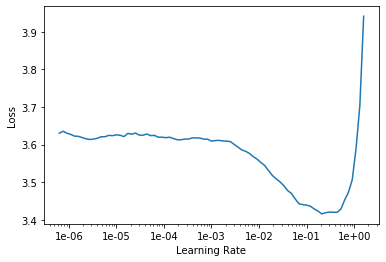

In [65]:
learn.lr_find()
learn.recorder.plot()

In [67]:
learn.fit_one_cycle(5, 1e-2, wd=0.2)

epoch,train_loss,valid_loss,accuracy,time
0,1.113523,2.064084,0.406000,00:00
1,1.638735,1.985375,0.424000,00:00
2,1.398344,1.693797,0.512000,00:00
3,1.026573,1.559276,0.543000,00:00
4,0.714862,1.525767,0.543000,00:00


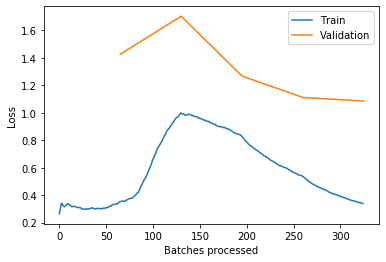

In [58]:
learn.recorder.plot_losses()

In [27]:
learn.show_results()

Imag_Comp16,Real_Comp6,zeta,Real_Comp2,Real_Comp22,Real_Comp20,fn,Real_Comp31,Imag_Comp26,Imag_Comp1,Real_Comp11,Real_Comp32,Imag_Comp9,Real_Comp19,Imag_Comp28,Real_Comp8,Imag_Comp20,Imag_Comp24,Real_Comp15,Imag_Comp30,Real_Comp27,Imag_Comp8,Mode,Real_Comp16,Imag_Comp15,Imag_Comp22,Real_Comp24,Imag_Comp2,Imag_Comp6,Real_Comp4,Real_Comp18,Real_Comp21,Real_Comp26,Real_Comp1,Imag_Comp27,Real_Comp12,Imag_Comp10,Real_Comp10,Imag_Comp19,Imag_Comp25,Imag_Comp12,Real_Comp23,Imag_Comp7,Imag_Comp31,Real_Comp9,Imag_Comp29,Imag_Comp17,Real_Comp7,Imag_Comp11,Imag_Comp13,Real_Comp29,Trial,Imag_Comp4,Real_Comp5,Imag_Comp23,Imag_Comp14,Real_Comp3,Real_Comp14,Real_Comp28,Real_Comp13,Imag_Comp32,Real_Comp17,Imag_Comp3,Real_Comp25,Real_Comp30,Imag_Comp21,Imag_Comp18,Imag_Comp5,target,prediction
0.0149,0.1807,21.6690,-0.0276,0.1118,0.1183,0.0136,0.0475,0.0124,-0.1969,0.0290,0.0300,-0.2592,0.0230,0.2396,0.0393,0.2247,0.0219,0.1774,0.2782,0.0163,0.0060,3.0000,0.0312,0.2897,0.2665,0.0294,0.0293,0.1801,0.1765,-0.0178,0.0424,-0.0335,-0.2283,0.0217,0.1569,0.0347,-0.0171,0.0198,-0.3118,0.1940,0.1302,0.2197,0.3343,-0.2095,0.1643,-0.2887,0.1984,0.0148,0.1587,-0.0012,117.0000,0.1339,0.0792,0.3265,0.2356,0.0231,0.1597,0.0714,0.0679,0.0332,-0.1489,0.0042,-0.0721,0.0443,0.1698,0.0307,0.1260,10,10
0.1973,-0.0580,17.0477,-0.0106,-0.1053,-0.1532,0.0060,0.0049,0.0799,-0.7158,-0.0741,-0.1949,-0.6534,-0.0886,0.1419,-0.0755,0.1774,0.1685,0.0162,0.0653,-0.1067,0.2207,1.0000,-0.1184,0.0154,0.0865,-0.1582,0.1097,0.1262,-0.0681,-0.0620,0.4820,-0.0786,0.1688,0.0530,-0.1130,0.1033,-0.0384,0.0793,-0.4748,0.2014,0.0067,0.0130,0.0237,0.3235,-0.4946,-0.5780,0.0242,0.0953,-0.6840,0.6071,40.0000,0.2234,0.1764,0.0187,0.1080,-0.0583,-0.0854,-0.1903,0.3348,0.1316,0.4657,0.1068,0.5834,-0.1211,-0.6051,0.0927,-0.7468,19,19
-0.3282,0.0376,17.2183,-0.0099,0.0762,0.3986,0.0063,0.0771,0.0156,0.0416,0.0578,0.3133,0.0509,0.0849,-0.3532,0.1154,-0.4865,-0.2926,0.0170,-0.0782,0.1178,-0.3537,1.0000,0.1763,-0.0630,-0.1069,0.2361,0.0249,-0.1188,0.1973,-0.0176,0.0313,-0.0240,0.0062,-0.0988,0.3072,0.0213,-0.0152,-0.1322,0.0461,-0.5311,0.0402,-0.0740,-0.0394,0.0024,-0.0675,0.0606,0.0228,-0.1440,-0.0778,0.0559,49.0000,-0.5628,0.0188,-0.0577,-0.1163,0.0338,0.0615,0.5093,0.0309,-0.2139,-0.0002,-0.1468,-0.0165,0.0974,-0.0772,0.0211,-0.0856,16,16
0.0583,-0.1777,38.6527,-0.1599,0.0164,0.0189,0.0261,-0.0065,-0.1407,-0.1379,0.1086,-0.0377,-0.2275,-0.0109,0.0123,0.0651,0.0141,0.0563,-0.0129,-0.1615,-0.1018,0.0358,6.0000,0.0419,-0.0067,-0.1790,-0.0052,-0.0840,-0.1187,0.0118,0.0230,0.0283,0.0959,-0.2330,0.1633,0.0185,-0.1456,-0.0991,0.1781,-0.2146,0.0080,-0.0118,0.0022,-0.0105,-0.1400,-0.2840,-0.2265,-0.0081,0.1746,-0.3134,0.1951,18.0000,-0.0045,-0.3144,-0.0110,-0.1846,0.1714,-0.1120,0.0110,-0.1985,0.0541,0.0281,0.1035,0.1432,0.1176,-0.3058,-0.1460,-0.1960,28,28
0.1138,0.0864,27.9384,-0.0513,0.0410,-0.0471,0.0238,-0.0186,-0.0147,0.0661,0.0327,-0.0136,0.1270,-0.0166,-0.0831,0.2548,-0.0643,0.1982,-0.2742,0.0922,-0.0291,0.0485,5.0000,0.2449,-0.2226,0.0746,0.0789,0.0321,0.0182,-0.0842,0.0203,0.2147,0.0136,0.2274,-0.0334,-0.0798,0.0187,-0.0422,-0.0246,0.2201,-0.0513,-0.1326,-0.1373,-0.3447,0.2239,0.5204,0.1806,-0.3112,-0.0467,0.3300,0.0364,82.0000,-0.0302,0.4615,-0.2892,0.0413,-0.0007,0.0896,-0.0170,0.4178,0.2514,0.0906,-0.0494,0.0004,0.0025,0.4409,0.0075,0.2011,5,5


Simply simply lovely. Works great on OMA discontinuous short modes

https://streamable.com/yis3u